In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to check these)
artists_to_load = "./data/cleaned_artists.csv"
nationalities_to_load = "./data/NationalityConversions.csv"

# Read the City and Ride Data
artists_df = pd.read_csv(artists_to_load)
nationalities_df = pd.read_csv(nationalities_to_load, encoding='ISO-8859-1')

In [2]:
artists_df.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,unknown,0.0
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,unknown,0.0
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,unknown,0.0
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,unknown,0.0


In [3]:
# What percent female in each country per 5 years
artists_df['female_count'] = np.where(artists_df['Gender'] == 'Female', 1, 0)
artists_df['total'] = 1
artists_df = artists_df.iloc[:, [3,5,9, 10]]
artists_df.head()

,Nationality,BeginDate,female_count,total
0,American,1930,0,1
1,Spanish,1936,0,1
2,American,1941,0,1
3,American,1946,0,1
4,Danish,1941,0,1


In [4]:
# Make percent_female df
percent_female = artists_df.groupby(['Nationality', 'BeginDate']).sum()
percent_female = percent_female.reset_index()
percent_female

,Nationality,BeginDate,female_count,total
0,Afghan,1973,1,1
1,Albanian,1964,0,1
2,Albanian,1969,0,1
3,Albanian,1974,0,1
4,Algerian,1922,0,1
...,...,...,...,...
3085,unknown,2009,0,3
3086,unknown,2010,0,3
3087,unknown,2011,0,2
3088,unknown,2012,0,1


In [5]:
percent_female = percent_female[percent_female.BeginDate != 0]
percent_female = percent_female[percent_female.Nationality != 'unknown']
percent_female = percent_female[percent_female.Nationality != 'Nationality unknown']
percent_female.head()

,Nationality,BeginDate,female_count,total
0,Afghan,1973,1,1
1,Albanian,1964,0,1
2,Albanian,1969,0,1
3,Albanian,1974,0,1
4,Algerian,1922,0,1


In [6]:
nationalities_df.head()

,Country,Nationality,Continent,Region
0,Afghanistan,Afghan,Asia,Southern Asia
1,Åland Islands,Ã land Island,Europe,Northern Europe
2,Albania,Albanian,Europe,Southern Europe
3,NaN,Sahrawi,Africa,Northern Africa
4,Algeria,Algerian,Africa,Northern Africa


In [7]:
nationalities_dict = dict(zip(nationalities_df['Nationality'], nationalities_df['Continent']))
percent_female['Continent'] = percent_female['Nationality'].map(nationalities_dict)
percent_female.head()

,Nationality,BeginDate,female_count,total,Continent
0,Afghan,1973,1,1,Asia
1,Albanian,1964,0,1,Europe
2,Albanian,1969,0,1,Europe
3,Albanian,1974,0,1,Europe
4,Algerian,1922,0,1,Africa


In [8]:
def end0(x):
    x = str(x)[:-1] + '0'
    return x

In [9]:
percent_female['Decade'] = percent_female['BeginDate'].apply(end0)
percent_female['Decade'] = percent_female['Decade'].astype(int)
percent_female

,Nationality,BeginDate,female_count,total,Continent,Decade
0,Afghan,1973,1,1,Asia,1970
1,Albanian,1964,0,1,Europe,1960
2,Albanian,1969,0,1,Europe,1960
3,Albanian,1974,0,1,Europe,1970
4,Algerian,1922,0,1,Africa,1920
...,...,...,...,...,...,...
2954,Zimbabwean,1924,0,1,Africa,1920
2955,Zimbabwean,1940,0,1,Africa,1940
2956,Zimbabwean,1944,0,1,Africa,1940
2957,Zimbabwean,1981,0,1,Africa,1980


In [10]:
percent_female.isna().sum()

Nationality     0
BeginDate       0
female_count    0
total           0
Continent       0
Decade          0
dtype: int64

In [12]:
percent_female = percent_female.groupby(['Continent', 'Decade']).sum()
percent_female['percent_female'] = percent_female['female_count'] / percent_female['total'] * 100
percent_female = percent_female.reset_index()
percent_female

,Continent,Decade,BeginDate,female_count,total,percent_female
0,Africa,1920,21168,1,11,9.090909
1,Africa,1930,23212,2,13,15.384615
2,Africa,1940,29164,3,19,15.789474
3,Africa,1950,29308,3,17,17.647059
4,Africa,1960,27496,8,21,38.095238
...,...,...,...,...,...,...
83,Oceania,1950,9771,1,5,20.000000
84,Oceania,1960,11788,2,7,28.571429
85,Oceania,1970,13827,2,7,28.571429
86,Oceania,1980,7932,0,4,0.000000


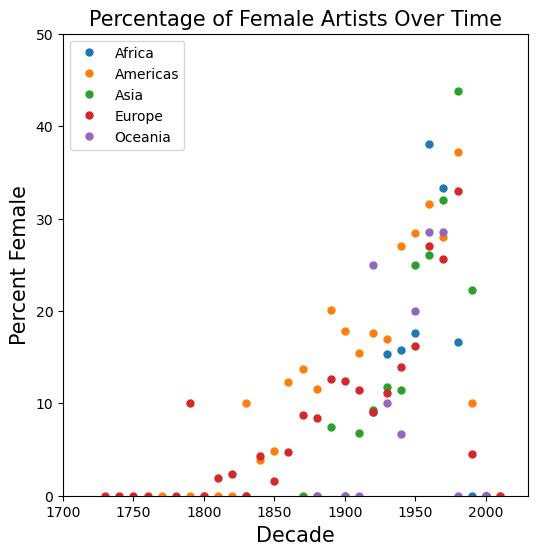

In [18]:
groups = percent_female.groupby('Continent')
plt.figure(figsize=(6,6))
for name, group in groups:
    plt.plot(group.Decade, group.percent_female, marker='o', linestyle=' ',markersize=5, label=name)
# Create labels for the x and y axes.
plt.xlabel("Decade", size=15)
plt.ylabel("Percent Female", size=15)
# Set the y limit between 0 and 100.
plt.ylim(0, 50)
plt.xlim(1700, 2030)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Create a title.
plt.title("Percentage of Female Artists Over Time", size=15)
# Add the legend.
plt.legend()
# Show the plot.
plt.show()